# Emerging Technologies Project


## Introduction

Quantum computing is a new way of performing computation.  
It differs from classical computation by utilizing Q-bits instead of normal bits
to perform a new type of computation that classical computation would  
take much longer to compute.

### Deutsch's algorithm

Deutsch's algorithm is a quantum algorithm that determines whether a given Boolean function is constant or balanced.

- A constant function is one that always returns the same value, regardless of the input.
- A balanced function is one that returns 0 for half of the inputs and 1 for the other half.

It can be represented using the following equation:

Deutsch's algorithm takes in 1 bit that are 0 or 1 and outputs a 1 bits also 0 or 1

$\Sigma = \{0,1\}$

$f : \Sigma\rightarrow \Sigma$

The algorithm outputs 0 for constant and 1 for balanced

Below are all the possible input function in a table

| function $f(x)$ | $x=0$ | $x=1$ | $f(0) ⨁ f(1)$ |
| --------------- | ----- | ----- | ------------- |
| $f_0$           | 0     | 0     | 0             |
| $f_1$           | 0     | 1     | 1             |
| $f_2$           | 1     | 0     | 1             |
| $f_3$           | 1     | 1     | 0             |

It is effective doing the xor opertation from classical computing.


For quantum simulation in python I can use Qiskit.  
It is a library that we can use to run quantum simulations and make circuits.

Matplotlib will be used for visualising the circuit diagrams generated from qiskit.


In [49]:
from qiskit import QuantumCircuit, Aer, execute
import matplotlib.pyplot as plt


In [50]:
def deutsch_algorithm_circuit(function: QuantumCircuit) -> QuantumCircuit:
    """
    Implements Deutsch's algorithm to determine whether a function f is constant or balanced.

    Arguments:
        function (QuantumCircuit): The function to evaluate.

    Returns:
        QuantumCircuit: The Deutsch algorithm circuit.
    """

    qc = QuantumCircuit(2, 1)

    qc.x(1)

    qc.barrier()

    # Apply Hadamard gates to both qubits
    qc.h(range(2))

    qc.barrier()

    qc.cnot(0, 1)

    # Apply Hadamard gates to qubit 0
    qc.h(0)

    # Measure the first qubit
    qc.measure(0, 0)

    return qc


In [51]:
def simulate_deutsch_algorithm(deutschCircuit: QuantumCircuit) -> str:
    """
    Aer simulation of Deutsch's algorithm.

    Arguments:
        deutschCircuit (QuantumCircuit): The Deutsch algorithm circuit.

    Returns:
        str: The function is either "constant" or "balanced".
    """

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(deutschCircuit, simulator, shots=1)
    result = job.result().get_counts()

    print(result)

    # Determine whether the function is constant or balanced
    if '0' in result and '1' in result:
        return "balanced"  # Function is balanced
    else:
        return "constant"  # Function is constant


In [52]:
# Define the functions
constantFunction = QuantumCircuit(2)
constantFunction.cx(0, 1)


In [53]:
circuit = deutsch_algorithm_circuit(constantFunction)


C:\Users\Econn\AppData\Local\Temp\ipykernel_12300\3184812808.py:23: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(0, 1)


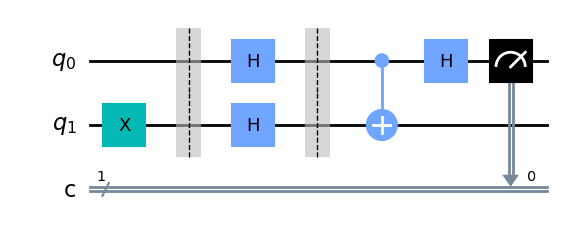

In [54]:
plt.figure(circuit.draw(output='mpl'))
plt.show()


In [55]:
# Determine whether the circuit is constant or balanced
print(simulate_deutsch_algorithm(circuit))


{'1': 1}
constant


## References:

- https://www.youtube.com/watch?v=CytwIKt1P_0
